Example complicated lactam analysis.

The input cores are generic in atoms and bonds, the system figures out the correct cores for grouping purposes.

This may be overkill ( and certainly takes a long enough time ).  What the algorithm is doing is first mapping each core to each other and then trying to optimizes the side chain selection across all sets.  I.e. it tries to make the matching choices such that all R1's are the same, all R2's are the same and so on.

**n.b.** *It is important that the cores are input in most to least specific as the RGroupDecomposition takes the first matching core.*

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition
import pandas as pd
from rdkit.Chem import PandasTools
from collections import OrderedDict

In [2]:
cores = OrderedDict()

cores['six'] = Chem.MolFromSmarts('[#8]-[#6](=O)-*~1~*~*~*~*~2-[#6]-[#6](=O)-*~1~2')
cores['five'] = Chem.MolFromSmarts('[#8]-[#6](=O)-*~1~*~*~*~2-[#6]-[#6](=O)-*~1~2')


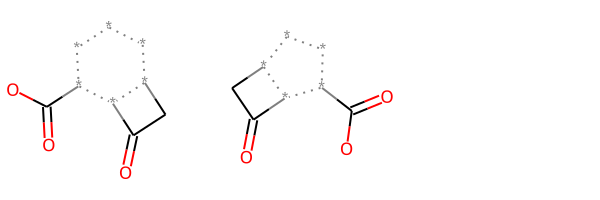

In [3]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(cores.values())

To use RGroupDecomposition:
  
  1. construct the class on the core rg = RGroupDecomposition(core)
  2. Call rg.Add( mol ) on the molecules.  If this returns -1, the molecule is not
     compatible with the core
  3. After all molecules are added, call rg.Process() to complete the rgroup
     decomposition.

In [4]:
rg = RGroupDecomposition(cores.values())

mols = []
count = 0
maxidx = -1
for line in open("compounds.txt"):
    sm = line.split()[-1]
    m = Chem.MolFromSmiles(sm)
    if m:
        count += 1
        maxidx = max(maxidx,rg.Add(m))
        if count % 1000 == 0:
            print("Added", count)

print ("Added %s to RGroup Decomposition out of %s"%(maxidx, count))

RDKit ERROR: [17:03:17] SMILES Parse Error: syntax error while parsing: CANONICAL_SMILES
RDKit ERROR: [17:03:17] SMILES Parse Error: Failed parsing SMILES 'CANONICAL_SMILES' for input: 'CANONICAL_SMILES'


Added 1000
Added 2000
Added 3000
Added 4000
Added 2309 to RGroup Decomposition out of 4340


In [5]:
rg.Process()

False

Rendering this many molecules is pretty taxing for the current system, this takes a while.

It is useful to disable logging here.  When making RGroup renderings there 
are a lot of sanitization warnings.

In [6]:
from rdkit import rdBase
rdBase.DisableLog("rdApp.*")

The RGroupDecomposition code is quite compatible with the python pandas integration.
Calling rg.GetRGroupsAsColumns() can be sent directly into a pandas table.

**n.b.** You need to call PandasTools.ChangeMoleculeRendering(frame) to allow the molecules
to be rendered properly.

In [7]:
frame = pd.DataFrame(rg.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(frame)

RuntimeError: Invariant Violation
	Duplicate labels in rgroup core!
	Violation occurred on line 45 in file Code/GraphMol/RGroupDecomposition/RGroupUtils.cpp
	Failed Expression: atoms.find(rlabel) == atoms.end()
	RDKIT: 2020.09.1dev1
	BOOST: 1_71


Just show the first few (for speed and to keep the notebook small)

In [ ]:
f2 = pd.DataFrame(frame.head())
PandasTools.ChangeMoleculeRendering(f2)
f2